# Supplementary Figure 4

In [1]:
import os.path as op
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotutils

In [2]:
df_dir = op.join('..', 'data', 'dataframes')

In [3]:
subjects, rois, tasks = plotutils.default_data()

In [4]:
plotutils.set_plot_style()

### Load dataframes

In [5]:
params = pd.read_csv(op.join(df_dir, 'group_ang_fits.csv'))

In [6]:
params_boot = pd.read_csv(op.join(df_dir, 'group_ang_fits_boots.csv'))
params_conf = plotutils.params_ci(params_boot)

In [7]:
params_snr   = pd.read_csv(op.join(df_dir, 'sim_snr_group_ang_fits.csv'))
params_lapse = pd.read_csv(op.join(df_dir, 'sim_lapse_group_ang_fits.csv'))
params_assoc = pd.read_csv(op.join(df_dir, 'sim_assoc_group_ang_fits.csv'))
params_ang   = pd.read_csv(op.join(df_dir, 'sim_ang_group_ang_fits.csv'))

### Define plot style

In [8]:
def plot_sim_fwhm(params_mem, fwhm_conf_mem, params_sim, sim_var, xticklabels, xlabel):
    
    g = sns.catplot(x=sim_var, y='fwhm_deg', hue='roi', col='roi', col_order=rois, 
                    hue_order=rois, palette=roi_pal, s=4, lw=0, height=3.75, aspect=.8,
                    data=params_sim)

    for i, roi in enumerate(rois):
        fwhm = params_mem.query("roi==@roi")['fwhm_deg'].values[0]
        y1_95, y2_95 = fwhm_conf_mem.query("roi==@roi & conf_level==95")['ci'].values[0]
        y1_68, y2_68 = fwhm_conf_mem.query("roi==@roi & conf_level==68")['ci'].values[0]
        g.axes.flatten()[i].fill_between(x=[-.1, 4.1], y1=y1_95, y2=y2_95, color=roi_pal[i], lw=0, alpha=.1)
        g.axes.flatten()[i].plot([-.1, 4.1], [y1_68, y1_68], c=roi_pal[i], ls='--', lw=2)
        g.axes.flatten()[i].plot([-.1, 4.1], [y2_68, y2_68], c=roi_pal[i], ls="--", lw=2)
        g.axes.flatten()[i].plot([-.1, 4.1], np.repeat(fwhm, 2), c=roi_pal[i], lw=2)

    g.set(ylim=[0, 368], yticks=[0, 100, 200, 300, 360])
    g.set_xticklabels(xticklabels)
    g.set_xlabels(xlabel)
    g.set_ylabels('FWHM')
    g.set_titles("{col_name}")

    sns.despine(trim=True)
    plt.gcf().tight_layout()

### Supplementary Figure 4a

In [9]:
roi_pal = ['#c44e52', '#dd8452', '#ccb974', '#55a868', '#4c72b0', '#8172b3']

params_mem = params.query("task=='memory'")
fwhwm_conf_mem = params_conf.query("task=='memory' & param=='fwhm_deg'")

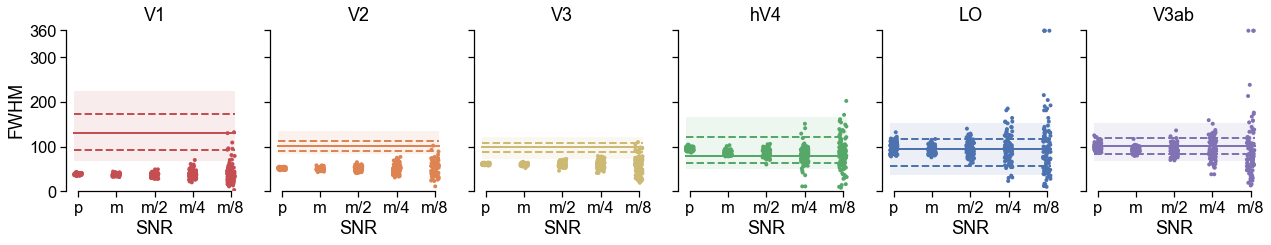

In [10]:
plot_sim_fwhm(params_mem, fwhwm_conf_mem, params_snr, 'noise_factor', ['p', 'm', 'm/2', 'm/4', 'm/8'], 'SNR')

### Supplementary Figure 4b

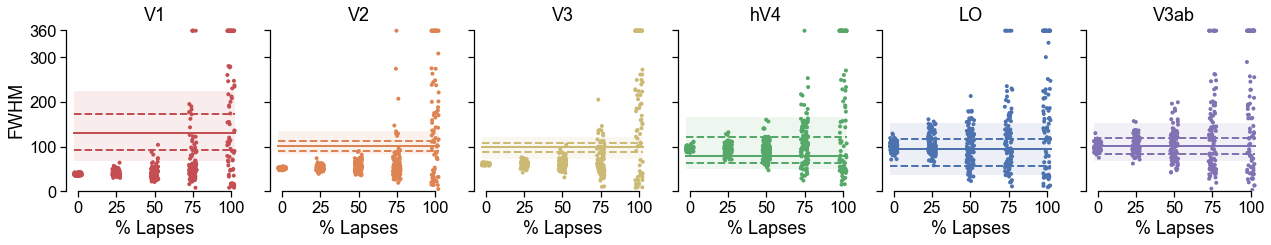

In [11]:
plot_sim_fwhm(params_mem, fwhwm_conf_mem, params_lapse, 'nlapse', [0, 25, 50, 75, 100], '% Lapses')

### Supplementary Figure 4c

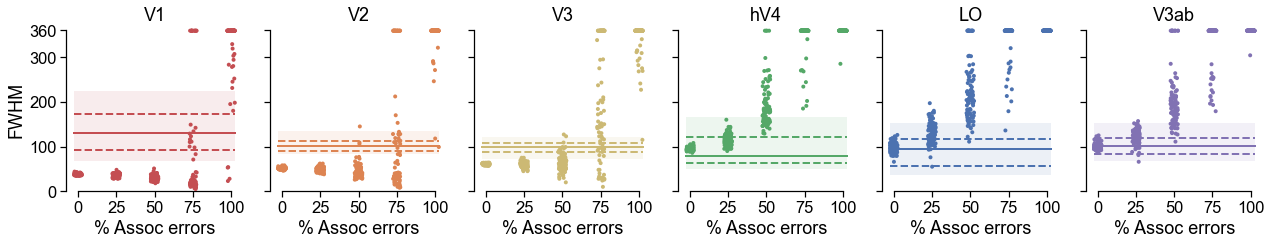

In [12]:
plot_sim_fwhm(params_mem, fwhwm_conf_mem, params_assoc, 'n_assoc_err', [0, 25, 50, 75, 100], '% Assoc errors')

### Supplementary Figure 4d

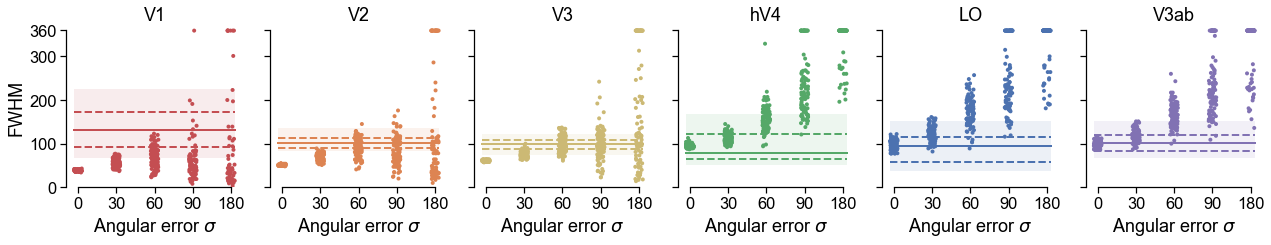

In [13]:
plot_sim_fwhm(params_mem, fwhwm_conf_mem, params_ang, 'err_std', [0, 30, 60, 90, 180], 'Angular error $\\sigma$')